In [1]:
import numpy as np
import matplotlib.pyplot as plt

from plotting_helpers import *

### Cifar sequential sweep over k and m

In [2]:
df = get_sweep_dataframe('w1f4uxpq')
df.head()

,run_id,name,state,k,m,p,lr,seed,device,epochs,...,test_batch_size,preprocess_dataset,_wandb,_runtime,test_acc,test_loss,_timestamp,train_batch_loss,train_epoch_loss,_step
0,d4vhf51v,cifar10_sequential_k=29100_m=512_p=0.5_lr=0.00...,finished,29100,512,0.5,0.0005,282,cuda,300,...,512,False,{'runtime': 190},191.015313,0.520765,996.825378,1.682441e+09,0.346077,10.165865,14899200
1,z751z4ur,cifar10_sequential_k=29100_m=128_p=0.5_lr=0.00...,finished,29100,128,0.5,0.0005,282,cuda,300,...,512,False,{'runtime': 190},190.711411,0.530325,532.704983,1.682441e+09,0.038351,8.135897,14899200
2,5sxg5jjs,cifar10_sequential_k=29100_m=64_p=0.5_lr=0.000...,finished,29100,64,0.5,0.0005,282,cuda,300,...,512,False,{'runtime': 189},190.210237,0.534848,382.066833,1.682440e+09,0.032813,5.720416,14899200
3,nulu5vr0,cifar10_sequential_k=29100_m=8_p=0.5_lr=0.0005...,finished,29100,8,0.5,0.0005,282,cuda,300,...,512,False,{'runtime': 472},472.683051,0.541632,167.099731,1.682441e+09,0.017659,7.558320,14899200
4,oke7yut3,cifar10_sequential_k=29100_m=1_p=0.5_lr=0.0005...,finished,29100,1,0.5,0.0005,282,cuda,300,...,512,False,{'runtime': 190},191.167906,0.548931,45.374452,1.682440e+09,0.010462,3.535947,14899200


In [3]:
epochs = df.epochs[0]

In [4]:
# different k values
for k in df.k.unique():
    print(f'k={k}: {k // BATCHES_PER_EPOCH} epochs with same mask, {epochs * BATCHES_PER_EPOCH // k} different masks')

k=29100: 300 epochs with same mask, 1 different masks
k=9700: 100 epochs with same mask, 3 different masks
k=2425: 25 epochs with same mask, 12 different masks
k=485: 5 epochs with same mask, 60 different masks
k=97: 1 epochs with same mask, 300 different masks
k=1: 0 epochs with same mask, 29100 different masks


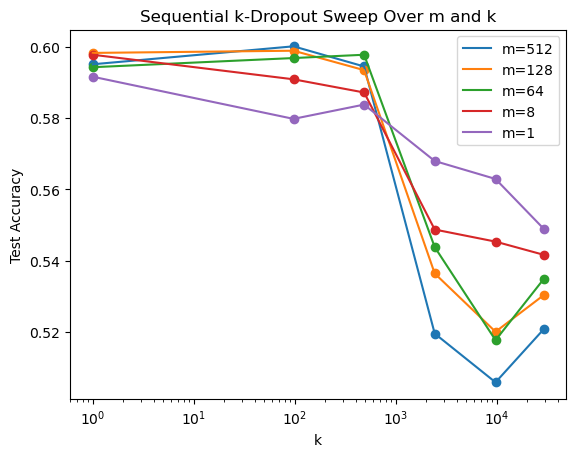

In [5]:
# plot for k
for m in df.m.unique():
    df_filtered = df[df.m == m]
    plt.scatter(df_filtered.k, df_filtered.test_acc)
    plt.plot(df_filtered.k, df_filtered.test_acc, label=f'm={m}')

plt.xscale('log')
plt.title('Sequential k-Dropout Sweep Over m and k')
plt.xlabel('k')
plt.ylabel('Test Accuracy')
plt.legend();

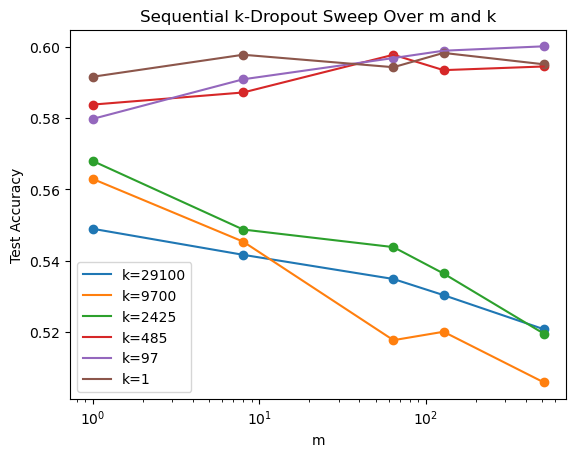

In [6]:
# plot for m
for k in df.k.unique():
    df_filtered = df[df.k == k]
    plt.scatter(df_filtered.m, df_filtered.test_acc)
    plt.plot(df_filtered.m, df_filtered.test_acc, label=f'k={k}')

plt.xscale('log')
plt.title('Sequential k-Dropout Sweep Over m and k')
plt.xlabel('m')
plt.ylabel('Test Accuracy')
plt.legend();

### Cifar sequential sweep over k to find bump

In [7]:
df_k = get_sweep_dataframe('kehid6px')
df_k.head()

,run_id,name,state,k,m,p,lr,seed,device,epochs,...,test_batch_size,preprocess_dataset,test_acc,test_loss,_timestamp,train_batch_loss,train_epoch_loss,_step,_wandb,_runtime
0,2o0itxee,cifar10_sequential_k=29100_m=512_p=0.5_lr=0.00...,finished,29100,512,0.5,0.0005,284,cuda,300,...,512,False,0.531558,964.090424,1.682452e+09,0.028488,9.739902,14899200,{'runtime': 191},191.783334
1,33chj9rn,cifar10_sequential_k=29100_m=512_p=0.5_lr=0.00...,finished,29100,512,0.5,0.0005,283,cuda,300,...,512,False,0.512644,1014.798111,1.682452e+09,0.815736,17.832019,14899200,{'runtime': 189},190.200197
2,i89mg90d,cifar10_sequential_k=29100_m=512_p=0.5_lr=0.00...,finished,29100,512,0.5,0.0005,282,cuda,300,...,512,False,0.526521,954.253700,1.682451e+09,0.044360,12.024767,14899200,{'runtime': 191},191.441020
3,vyhuw569,cifar10_sequential_k=29100_m=1_p=0.5_lr=0.0005...,finished,29100,1,0.5,0.0005,284,cuda,300,...,512,False,0.538651,46.665724,1.682452e+09,0.066207,5.426840,14899200,{'runtime': 458},459.118572
4,7hcqebfa,cifar10_sequential_k=29100_m=1_p=0.5_lr=0.0005...,finished,29100,1,0.5,0.0005,283,cuda,300,...,512,False,0.533306,44.914529,1.682451e+09,0.042341,5.365594,14899200,{'runtime': 189},189.703217


In [8]:
# different k values
for k in df_k.k.unique():
    print(f'k={k}: {k // BATCHES_PER_EPOCH} epochs with same mask, {epochs * BATCHES_PER_EPOCH // k} different masks')

k=29100: 300 epochs with same mask, 1 different masks
k=9700: 100 epochs with same mask, 3 different masks
k=2425: 25 epochs with same mask, 12 different masks
k=1940: 20 epochs with same mask, 15 different masks
k=1455: 15 epochs with same mask, 20 different masks
k=970: 10 epochs with same mask, 30 different masks
k=485: 5 epochs with same mask, 60 different masks
k=97: 1 epochs with same mask, 300 different masks
k=1: 0 epochs with same mask, 29100 different masks


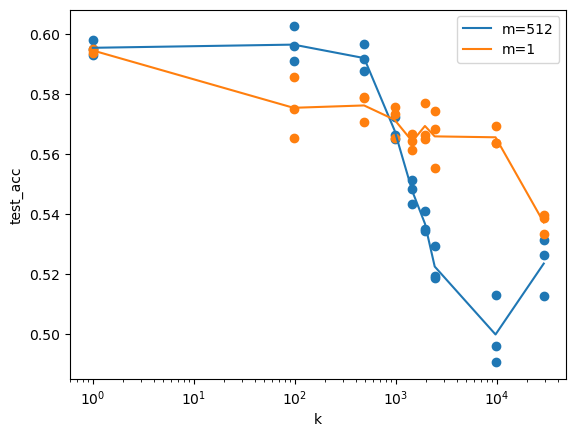

In [9]:
# plot for k
for m in df_k.m.unique():
    df_filtered = df_k[df_k.m == m]
    df_means = df_filtered.groupby('k').mean(numeric_only=True)
    plt.scatter(df_filtered.k, df_filtered.test_acc)
    plt.plot(df_means.index, df_means.test_acc, label=f'm={m}')

plt.xscale('log')
plt.xlabel('k')
plt.ylabel('test_acc')
plt.legend();

### No dropout vs. standard vs. sequential baselines

In [10]:
df_no = get_sweep_dataframe('6sxbqxn3')
df_std = get_sweep_dataframe('1xiu49jn')
df_seq = get_sweep_dataframe('2pnf6l0e')

len(df_no), len(df_std), len(df_seq)

(5, 5, 20)

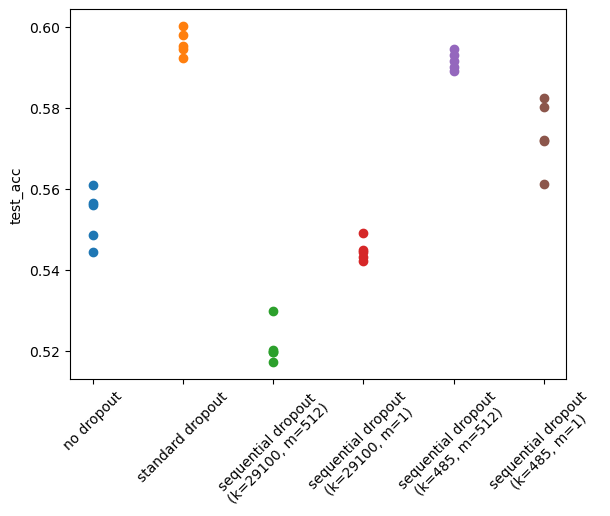

In [11]:
ks = df_seq.k.unique()
ms = df_seq.m.unique()

plt.scatter(['no dropout' for _ in range(len(df_no))], df_no.test_acc)
plt.scatter(['standard dropout' for _ in range(len(df_std))], df_std.test_acc)
for k in ks:
    for m in ms:
        df_filtered = df_seq[(df_seq.k == k) & (df_seq.m == m)]
        plt.scatter([f'sequential dropout\n(k={k}, m={m})' for _ in range(len(df_filtered))], df_filtered.test_acc)

plt.ylabel('test_acc')
plt.xticks(rotation=45);